In [1]:
library(tidyverse)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
tennis <- read_csv("player_stats.csv")
#read in the tennis data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



In [3]:
#replaces the spaces in the column names with "."
names(tennis)<-make.names(names(tennis),unique = TRUE)
#mutate the Country column to be a factor
tennis <- mutate(tennis, Country = as.factor(Country))

In [23]:
#Isolate the dollar amount from the Prize.Money column (US$ 18,879,855  24th all-time leader in earnings) -> (US$ 18,879,855)
tennis_fix_prize_money <- mutate(tennis, Prize.Money = str_extract(tennis$Prize.Money, "(\\$\\s?(\\d\\d?\\d?)(,\\d\\d\\d)*(\\.\\d\\d)?)"))

#Remove the currency and commas (US$ 18,879,855) -> 18870855 (numeric)
tennis_fix_prize_money <- mutate(tennis_fix_prize_money, Prize.Money = as.numeric((gsub("\\D+","", tennis_fix_prize_money$Prize.Money))))

#Remove the data from the Age column (26 (25-04-1993)) -> 26 (numeric)
tennis_cleaned <- mutate(tennis_fix_prize_money, Age = as.numeric((gsub("\\([^)]*\\)","", tennis_fix_prize_money$Age))))

In [34]:
#Select the Age, Prize Money and Country columns, remove any rows that contain NA
tennis_table <-select(tennis_cleaned, Age, Prize.Money, Country) %>%
na.omit()

#Group by country and calculate average age and prize money won, and number of winners from each country
tennis_table <- group_by(tennis_table, Country) %>%
summarize(age_avg = round(mean(Age), digits = 1) , prize_money_avg = round(mean(Prize.Money), digits = 0), n = n())

#Arrange in descending order of n 
tennis_table <-arrange(tennis_table, desc(n))

tennis_table

`summarise()` ungrouping output (override with `.groups` argument)



Country,age_avg,prize_money_avg,n
<fct>,<dbl>,<dbl>,<int>
France,25.6,3393783,38
United States,25.2,1917383,37
Italy,27.2,1759611,29
Spain,28.4,8186512,28
Germany,27.3,2467922,25
Argentina,26.6,2739004,20
Australia,25.3,1616802,20
Russian Federation,25.6,1967398,16
Serbia,26.8,14062218,12


Warning message:
“Removed 81 rows containing missing values (geom_point).”


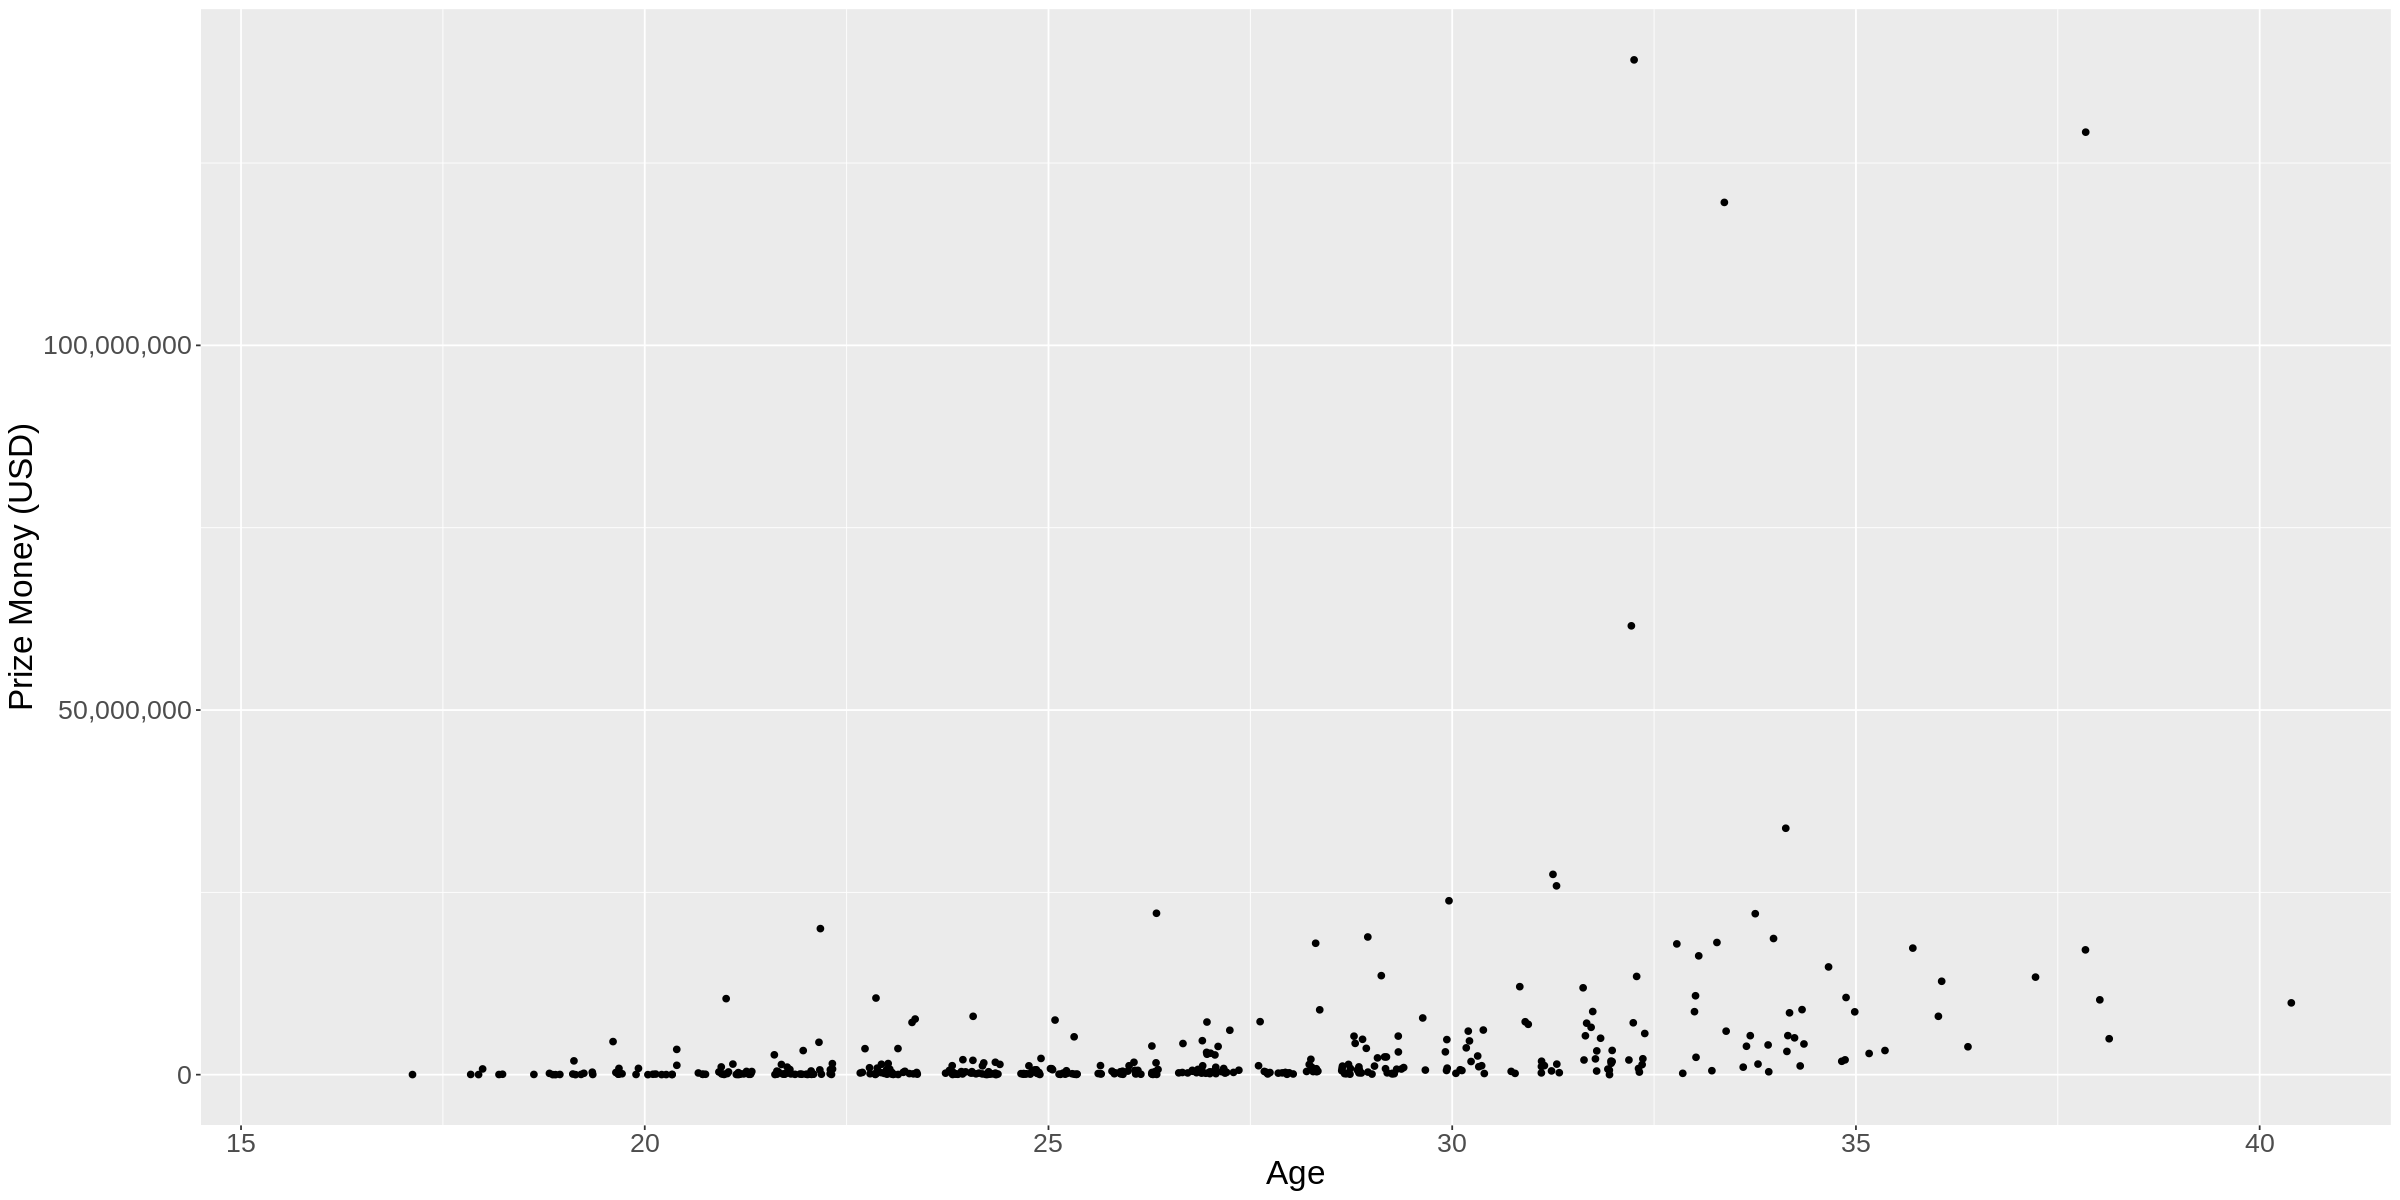

In [32]:
options(repr.plot.width = 20, repr.plot.height = 10)
tennis_plot <- ggplot(tennis_cleaned, aes(x = Age, y = Prize.Money)) +
geom_point(position="jitter") +
xlab("Age") +
ylab("Prize Money (USD)") +
scale_y_continuous(labels = scales::comma) +
theme(text = element_text(size=20))
tennis_plot